# **PGA Tournament Data Cleaning and EDA Project**

## *Data Cleaning*

#### Importing the necessary libraries to perform Data Cleaning and EDA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#*Loading the dataset
df = pd.read_csv('ASA All PGA Raw Data - Tourn Level.csv')

#### Display first few rows
#### Check column names and data types
#### Basic statistics for numerical columns

In [8]:
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

First 5 rows:
  Player_initial_last  tournament id  player id  hole_par  strokes  hole_DKP  \
0            A. Ancer      401353224       9261       288      289      60.0   
1           A. Hadwin      401353224       5548       288      286      72.5   
2           A. Lahiri      401353224       4989       144      147      21.5   
3             A. Long      401353224       6015       144      151      20.5   
4            A. Noren      401353224       3832       144      148      23.5   

   hole_FDP  hole_SDP  streak_DKP  streak_FDP  ...  purse  season  no_cut  \
0      51.1        56           3         7.6  ...   12.0    2022       0   
1      61.5        61           8        13.0  ...   12.0    2022       0   
2      17.4        27           0         0.0  ...   12.0    2022       0   
3      13.6        17           0         0.4  ...   12.0    2022       0   
4      18.1        23           0         1.2  ...   12.0    2022       0   

   Finish  sg_putt  sg_arg  sg_app  sg_ott

***Initial dataset information query shows we have PGA Tournament data with 37 columns including player information, player performance, and strokes gained metrics.***

#### Columns Unnamed: 2, Unnamed: 3, and Unnamed: 4 are entirely NA and serve no purpose. We need to drop these columns to begin data cleaning.

In [9]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
print("Columns after dropping:", df.columns.tolist())

Columns after dropping: ['Player_initial_last', 'tournament id', 'player id', 'hole_par', 'strokes', 'hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP', 'streak_FDP', 'streak_SDP', 'n_rounds', 'made_cut', 'pos', 'finish_DKP', 'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP', 'player', 'tournament name', 'course', 'date', 'purse', 'season', 'no_cut', 'Finish', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']


#### Check for missing values

In [10]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Player_initial_last        0
tournament id              0
player id                  0
hole_par                   0
strokes                    0
hole_DKP                   0
hole_FDP                   0
hole_SDP                   0
streak_DKP                 0
streak_FDP                 0
streak_SDP                 0
n_rounds                   0
made_cut                   0
pos                    15547
finish_DKP                 0
finish_FDP                 0
finish_SDP                 0
total_DKP                  0
total_FDP                  0
total_SDP                  0
player                     0
tournament name            0
course                     0
date                       0
purse                      0
season                     0
no_cut                     0
Finish                  7683
sg_putt                 7684
sg_arg                  7684
sg_app                  7684
sg_ott                  7684
sg_t2g                  7684
sg_total                768

#### For strokes gained metrics (sg_) we need to input a value of "0" for the missing or null values. This is an indication of players missing the cut or withdrawing before finishing the tournamanet, resulting in them receiving null or missing values for their strokes gained metrics.

In [13]:
sg_columns = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']
df[sg_columns] = df[sg_columns].fillna(0)
print("Missing SG values after imputation:")
print(df[sg_columns].isnull().sum())

Missing SG values after imputation:
sg_putt     0
sg_arg      0
sg_app      0
sg_ott      0
sg_t2g      0
sg_total    0
dtype: int64


#### Convert "pos" to numeric to handle non-numeric values and create a new column (finish_pos) for "Finish" to handle analysis. 

In [36]:
df['pos'] = pd.to_numeric(df['pos'], errors='coerce')

df['finish_pos'] = df['Finish'].str.extract(r'(\d+)').astype(float)

df.loc[df['Finish'].isin(['CUT', 'NA', 'WD', 'nan', 'W/D', 'DQ', 'MDF']) | df['Finish'].isna(), 'finish_pos'] = 999

print("Missing finish_pos values:", df['finish_pos'].isnull().sum())

Missing finish_pos values: 0


#### For the fantasy point columns we need to impute any missing values with "0" to ensure accurate data cleaning for future EDA.

In [37]:
points_columns = ['hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP', 'streak_FDP', 'streak_SDP', 'finish_DKP', 'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP']
df[points_columns] = df[points_columns].fillna(0)

#### Check for and remove any duplicate values which could skew EDA. 

In [38]:
print("Number of duplicates:", df.duplicated().sum())

df = df.drop_duplicates()
print("Rows after dropping duplicates:", len(df))

Number of duplicates: 0
Rows after dropping duplicates: 36864


#### Standardize data types for EDA

In [39]:
df['date'] = pd.to_datetime(df['date'])

numeric_columns = ['hole_par', 'strokes', 'n_rounds', 'purse', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print("Data Types:")
print(df.dtypes)

Data Types:
Player_initial_last            object
tournament id                   int64
player id                       int64
hole_par                        int64
strokes                         int64
hole_DKP                      float64
hole_FDP                      float64
hole_SDP                        int64
streak_DKP                      int64
streak_FDP                    float64
streak_SDP                      int64
n_rounds                        int64
made_cut                        int64
pos                           float64
finish_DKP                      int64
finish_FDP                      int64
finish_SDP                      int64
total_DKP                     float64
total_FDP                     float64
total_SDP                       int64
player                         object
tournament name                object
course                         object
date                   datetime64[ns]
purse                         float64
season                          int64


#### Validate data consistencies
#### Check for outliers

In [40]:
print("Rows with negative strokes:", len(df[df['strokes'] < 0]))

print("Rows with n_rounds > 4:", len(df[df['n_rounds'] > 4]))

print("SG Total outliers:", df[df['sg_total'].abs() > 10][['player', 'tournament name', 'sg_total']])

Rows with negative strokes: 0
Rows with n_rounds > 4: 0
SG Total outliers:                  player                      tournament name  sg_total
3478      Kevin Stadler         Sanderson Farms Championship    -10.34
4484     Smylie Kaufman                Barbasol Championship    -12.46
5549          John Daly                     PGA Championship    -10.35
6639       Kyle Stanley             The Players Championship    -10.58
6952      Matthew Wolff             WGC-Workday Championship    -11.01
7420    Andres Gonzales               Farmers Insurance Open    -12.24
13191    Smylie Kaufman  Shriners Hospital for Children Open    -10.95
14493    Craig Brischke                              3M Open    -10.13
18029  Mackenzie Hughes                      The RSM Classic    -10.12
23958        Ryan Moore       Dell Technologies Championship    -10.09
26832        Matt Every                    The Honda Classic    -13.67
30855    Charlie Beljan                   Shell Houston Open    -10.39
30

#### Final cleaning check

In [50]:
print("Final Missing Values:")
print(df.isnull().sum())

print("Final Dataset Shape:", df.shape)

Final Missing Values:
Player_initial_last        0
tournament id              0
player id                  0
hole_par                   0
strokes                    0
hole_DKP                   0
hole_FDP                   0
hole_SDP                   0
streak_DKP                 0
streak_FDP                 0
streak_SDP                 0
n_rounds                   0
made_cut                   0
pos                    15547
finish_DKP                 0
finish_FDP                 0
finish_SDP                 0
total_DKP                  0
total_FDP                  0
total_SDP                  0
player                     0
tournament name            0
course                     0
date                       0
purse                      0
season                     0
no_cut                     0
Finish                  7683
sg_putt                    0
sg_arg                     0
sg_app                     0
sg_ott                     0
sg_t2g                     0
sg_total             

#### Save the cleaned dataset

In [56]:
df.to_csv('cleaned_pga_data.csv', index=False)

## *EDA*

#### Summarize key statistics in the data to get a better understanding of what we want to look for and how we can explore.

In [52]:
key_columns = ['strokes', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'total_DKP', 'total_FDP', 'total_SDP', 'finish_pos']
print("Summary Statistics:")
print(df[key_columns].describe())

Summary Statistics:
            strokes       sg_putt        sg_arg        sg_app        sg_ott  \
count  36864.000000  36864.000000  36864.000000  36864.000000  36864.000000   
mean     224.114502     -0.095782     -0.032251     -0.080548     -0.036329   
std       66.789007      0.997179      0.647298      0.997102      0.719237   
min       66.000000     -5.990000     -6.430000     -9.250000     -7.740000   
25%      146.000000     -0.540000     -0.310000     -0.520000     -0.300000   
50%      272.000000      0.000000      0.000000      0.000000      0.000000   
75%      281.000000      0.440000      0.290000      0.460000      0.360000   
max      325.000000      4.430000      3.170000      4.670000      2.770000   

             sg_t2g      sg_total     total_DKP     total_FDP     total_SDP  \
count  36864.000000  36864.000000  36864.000000  36864.000000  36864.000000   
mean      -0.149087     -0.241822     54.383260     54.196802     52.177762   
std        1.461826      1.7541

#### Now we can identify top performers based on Stroked Gained Total (sg_total), Finishing Position (finish_pos), or any of the fantasy points metrics.

In [54]:
player_counts = df['player'].value_counts()
players_with_multiple = player_counts[player_counts >= 5].index
top_players = df[df['player'].isin(players_with_multiple)].groupby('player')['sg_total'].mean().sort_values(ascending=False).head(10)
print("Top 10 Players by Average SG Total:")
print(top_players)

top_finishers = df[(df['finish_pos'] < 999) & df['player'].isin(players_with_multiple)].groupby('player')['finish_pos'].mean().sort_values().head(10)
print("\nTop 10 Players by Average Finish Position:")
print(top_finishers)

Top 10 Players by Average SG Total:
player
Jon Rahm             1.253590
Patrick Cantlay      1.165556
Dustin Johnson       1.041489
Rory McIlroy         1.021345
Justin Thomas        0.874624
Collin Morikawa      0.861563
Sungjae Im           0.793486
Scottie Scheffler    0.770822
Viktor Hovland       0.756923
Webb Simpson         0.731465
Name: sg_total, dtype: float64

Top 10 Players by Average Finish Position:
player
Guido Migliozzi     8.500000
Dustin Johnson     15.010753
Rory McIlroy       15.097222
Jon Rahm           15.253012
Patrick Cantlay    16.565789
Justin Thomas      16.783019
Cameron Young      18.000000
Benjamin Hebert    18.000000
Mito Pereira       19.611111
Paul Casey         20.445783
Name: finish_pos, dtype: float64


#### Tournament analysis comparing tournament rankings based on difficutly or prize money.

In [57]:
tournament_stats = df.groupby('tournament name')[['strokes', 'sg_total']].mean().sort_values(by='strokes')
print("Tournament Statistics:")
print(tournament_stats)

top_purses = df.groupby('tournament name')['purse'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Tournaments by Purse:")
print(top_purses)

Tournament Statistics:
                                                     strokes  sg_total
tournament name                                                       
CareerBuilder Challenge                           176.528536  0.000000
A Military Tribute at The Greenbrier              197.894040 -0.392185
Workday Charity Open                              202.286624 -0.537325
Palmetto Championship at Congaree                 203.615894 -0.541325
3M Open                                           203.713974 -0.459454
...                                                      ...       ...
WGC-Workday Championship                          283.271429 -0.022857
The CJ Cup @ Nine Bridges                         283.562500  0.000000
The CJ Cup @ Shadow Creek                         284.294872  0.012179
WGC-HSBC Champions                                287.297297  0.000000
World Golf Championships - Cadillac Championship  289.095652  0.000000

[80 rows x 2 columns]

Top 5 Tournaments by Purse:
to

#### Correlation analysis exploring relationship between strokes gaine metrics, fantasy points, and finishing position.

Correlation Matrix:
             sg_putt    sg_arg    sg_app    sg_ott    sg_t2g  sg_total  \
sg_putt     1.000000 -0.040456 -0.122393 -0.091898 -0.154887  0.500481   
sg_arg     -0.040456  1.000000 -0.046549 -0.064423  0.412050  0.332566   
sg_app     -0.122393 -0.046549  1.000000  0.067792  0.732022  0.558644   
sg_ott     -0.091898 -0.064423  0.067792  1.000000  0.534526  0.408585   
sg_t2g     -0.154887  0.412050  0.732022  0.534526  1.000000  0.772156   
sg_total    0.500481  0.332566  0.558644  0.408585  0.772156  1.000000   
total_DKP   0.367816  0.191407  0.379095  0.285366  0.511761  0.686298   
finish_pos -0.435308 -0.297710 -0.483277 -0.365576 -0.679013 -0.875106   

            total_DKP  finish_pos  
sg_putt      0.367816   -0.435308  
sg_arg       0.191407   -0.297710  
sg_app       0.379095   -0.483277  
sg_ott       0.285366   -0.365576  
sg_t2g       0.511761   -0.679013  
sg_total     0.686298   -0.875106  
total_DKP    1.000000   -0.698545  
finish_pos  -0.698545    

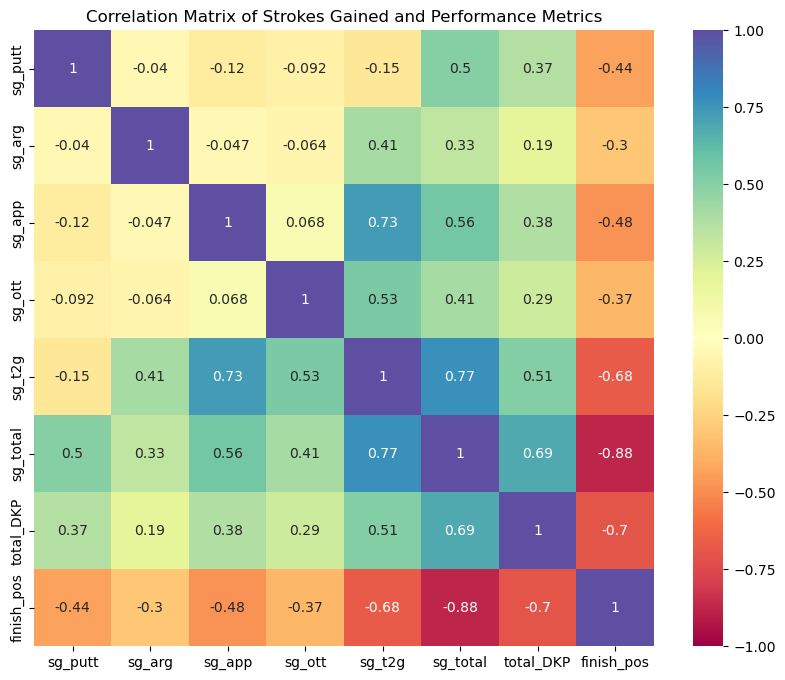

In [63]:
corr_data = df[df['finish_pos'] < 999][['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'total_DKP', 'finish_pos']]
corr_matrix = corr_data.corr()
print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Strokes Gained and Performance Metrics')
plt.show()

#### Distribution analysis examining the distribution of key metrics to identify typical performers and outliers.

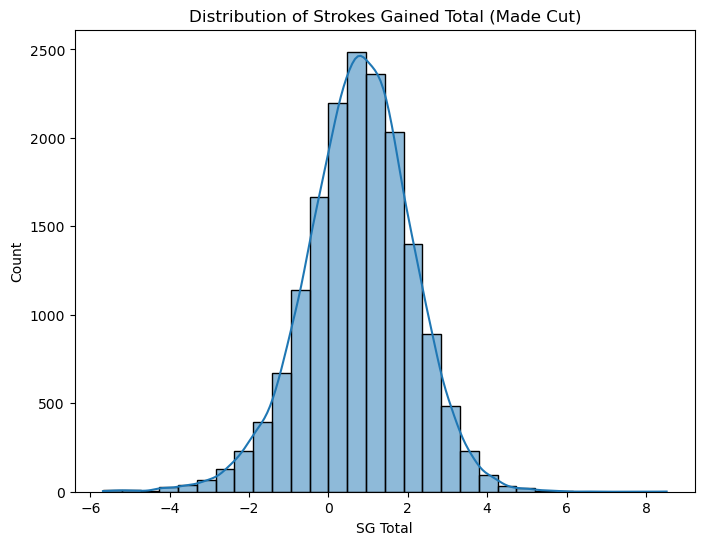

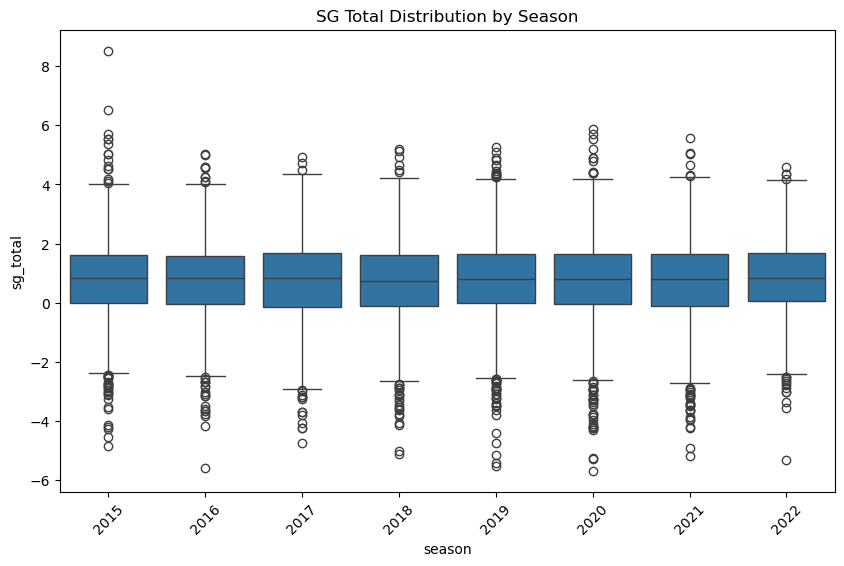

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['finish_pos'] < 999]['sg_total'], kde=True, bins=30)
plt.title('Distribution of Strokes Gained Total (Made Cut)')
plt.xlabel('SG Total')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='sg_total', data=df[df['finish_pos'] < 999])
plt.title('SG Total Distribution by Season')
plt.xticks(rotation=45)
plt.show()

#### Course specific performance analyzing how players perform on specific courses.

In [84]:
course_counts = df['course'].value_counts()
courses_with_multiple = course_counts[course_counts >= 50].index
print("Courses with at least 50 entries:")
print(courses_with_multiple.tolist())

Courses with at least 50 entries:
['Pebble Beach Resort - Pebble Beach, CA', 'Torrey Pines North - La Jolla, CA', 'La Quinta CC - La Quinta, CA', 'Muirfield Village Golf Club - Dublin, OH', 'Sea Island Resort - Sea Island, GA', 'PGA National - Palm Beach Gardens, FL', 'TPC Summerlin - Las Vegas, NV', 'Harbour Town Golf Links - Hilton Head Island, SC', 'Waialae CC - Honolulu, HI', 'Riviera Country Club - Pacific Palisades, CA', 'TPC Scottsdale - Scottsdale, AZ', 'TPC Sawgrass - Ponte Vedra Beach, FL', 'Sedgefield Country Club - Greensboro, NC', 'Colonial - Ft. Worth, TX', 'El Camaleon GC - Quintana Roo, Mexico', 'Silverado Resort - Napa, CA', 'TPC San Antonio - San Antonio, TX', 'TPC River Highlands - Cromwell, CT', 'Quail Hollow Club - Charlotte, NC', 'Country Club of Jackson - Jackson, MS', 'Bay Hill - Orlando, FL', 'Innisbrook - Palm Harbor, FL', 'TPC Deere Run - Silvis, IL', 'TPC Southwind - Memphis, TN', 'Augusta National Golf Club - Augusta, GA', 'Corales Puntacana GC - Punta Cana

##### *In order to filter for different courses you will need to adjust the search reference in the course_performance[] series search in line 5.*

In [87]:
course_counts = df['course'].value_counts()
courses_with_multiple = course_counts[course_counts >= 50].index
course_performance = df[df['course'].isin(courses_with_multiple)].groupby(['player', 'course'])['sg_total'].mean().unstack().fillna(0)
print("Top Players by strokes gained on Torrey Pines - North:")
print(course_performance['Torrey Pines North - La Jolla, CA'].sort_values(ascending=False).head(10))

Top Players by strokes gained on Torrey Pines - North:
player
Adam Scott          2.970000
Aaron Rai           2.690000
Danny Willett       2.430000
Cameron Young       2.350000
Rory McIlroy        2.300000
Taylor Pendrith     2.190000
Will Zalatoris      2.106667
Charl Schwartzel    2.090000
Colt Knost          2.080000
Jon Rahm            2.051667
Name: Torrey Pines North - La Jolla, CA, dtype: float64
